<div style="display: flex; align-items: center;margin-bottom: 30px;color: #8EB944">
    <img src=https://wisoinbox.uni-koeln.de/images/wiso_button_en.png width="80"> 
    <span style="margin-left: 20px;font-size: 50px;font-weight:bold";>Group Project: Prescriptive Analytics</span>
</div>

<div>
    <span style="font-size: 20px;font-weight: bold";>Group Members:</span>

<ul>
    <li>Tom Boerrigter | 7419077</li>
    <li>Niklas Sterz | 7419545</li>
</ul>
</div>

<div class="alert alert-block alert-warning">
<b>Disclaimer:</b> Please do not use the "Run All Cells" function, as this may cause parts of the results, such as color maps, to be displayed incorrectly. Instead, run each cell individually in the intended order. This is necessary for getting the correct representation of all DataFrames, as some styling tools were used. In addition, some cells are collapsed to improve readability.
</div>

<div>
    <span style ="font-size: 40px; font-weight: bold; color: #8EB944">
        Preparation
    </span>
    
<hr style="color: #8EB944; height: 3px;background-color: #8EB944;border: none">
</div>

<span style ="font-size: 18px; font-weight: bold;color: #43556A;">
        Import the most important libraries
</span>
<hr style="color: #8EB944; height: 1px;background-color: #43556A;border: none">

In [1]:
# Please install these new libraries if you haven't already
#pip install faker

In [2]:
#pip install emoji

In [1]:
# Import the most important libraries at the top level
from ipywidgets import widgets, interactive_output
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Patch
import gurobipy as gp
from gurobipy import GRB
import math
import emoji
from faker import Faker
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Create an instance of the Faker class
fake = Faker()

In [2]:
# Import the provided data
data = pd.read_csv("Project_Data.csv", sep=';') 

<div style="margin-top: 30px; margin-bottom: 10px;">   
    <span style ="font-size: 40px; font-weight: bold; color: #8EB944; align: center">
        Question 1
    </span>
    <hr style="color: #8EB944; height: 3px;background-color: #8EB944;border: none"> 
    </div>
<div>
     <span style ="font-size: 23px; font-weight: bold; color: #8EB944">
        a) Analyse the data given and provide clusters
    </span>   
</div>

<span style ="font-size: 20px; font-weight: bold;color: #507F7F;">
        Step 1: Analyse the data
</span>
<hr style="color: #8EB944; height: 1px;background-color: #507F7F;border: none">

<span style ="font-size: 18px; font-weight: bold;color: #43556A;">
        Visualize the Original DataFrame
</span>

In [3]:
# Create a copy of the data and drop the index
data_vis = pd.DataFrame.copy(data)
data_vis.drop('index', axis = 1, inplace = True)

# Apply a colormap to the data
data_vis_show = data_vis.style.format(precision =2).background_gradient(cmap = 'binary', axis=None)

# Display the data to get a feel for it
display(data_vis_show)

,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,Week 11,Week 12,Week 13,Week 14
0,1,2,0,1,0,0,2,1,1,2,1,0,0,1
1,1,1,0,1,0,0,2,1,2,2,1,0,0,1
2,1,1,0,1,0,0,2,1,2,2,1,0,0,1
3,1,1,0,1,0,0,2,1,0,2,1,0,0,1
4,1,2,0,1,0,0,2,1,1,2,1,0,0,1
5,1,1,0,1,0,0,2,1,0,2,1,0,0,1
6,1,2,0,1,0,0,2,1,1,2,1,0,0,1
7,1,7,8,9,6,7,9,7,10,9,9,7,0,1
8,9,9,8,10,8,7,9,9,9,7,8,8,6,8
9,10,8,11,10,9,9,12,9,12,8,9,11,8,8


<div>
<span style ="text-align: justify; display: block; font-size: 15px;">
        <b>Summary:</b> Looking at the data, we can immediately identify several clusters. There seem to be five periods of high demand, e.g. from hours seven to 15, and periods inbetween of low demand. Furthermore, the demand at a given time seems to be constant over the 14 weeks. <br>
<div style="margin-top: 10px">The Clusters $ T_n $ we identified look as following: </div>
    <ul>
        <li>$ T_{1} = [7,15],$ </li>  
        <li>$ T_{2} = [31,40],$ </li>  
        <li>$ T_{3} = [56,65],$ </li>  
        <li>$ T_{4} = [79,88],$ </li>  
        <li>$ T_{5} = [151,161],$ </li>  
    </ul>
    Below we confirm our suspicion by applying a clustering algorithm to the data. To do this, we first aggregate the data into a single week by taking the average for each hour and dividing the data into high and low demand clusters using the sklearn library.
    </span>
</div>

<span style ="font-size: 18px; font-weight: bold;color: #43556A;">
        Calculate the clusters mathematically
</span>

In [4]:
# Transform the data into a multidimensional numpy array
data_matrix = np.array(data_vis).reshape(-1, 14)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_matrix)

# Set the number of clusters 
num_clusters = 2

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42,n_init=10)
clusters = kmeans.fit_predict(scaled_data)

clusters

/Users/niklassterz/Documents/machine_learning/fullstack/lib/python3.9/site-packages/threadpoolctl.py:1010: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

<div>
<span style ="text-align: justify; display: block; font-size: 15px;">
        <b>Analysis:</b> This array contains the results from the k-means algorithm. We can cleary see, that the algorithm identified the same clusters as we did visually, confirming our suspicions. The borders of the clusters are a bit diffrent, but the mathematical method nearly yields the same results as the visual one. <br>Going forward, we will use the results of the k-means algorithm.
    </span>
</div>

<span style ="font-size: 20px; font-weight: bold;color: #507F7F;">
        Step 2: Visualize the data
</span>
<hr style="color: #8EB944; height: 1px;background-color: #507F7F;border: none">


<span style ="font-size: 18px; font-weight: bold;color: #43556A;">
        Plot the data with the clusters
</span>

In [5]:
# Set the style of the plot
plt.style.use('ggplot')

# Define the shifts
night = [0,24,48,72,96,120,144]
early = [x+8 for x in night]
late = [x+16 for x in night]

def display_plot(show_shifts):
    # Since the demand at a given time seems to be constant over the weeks we can aggregate the data to show just one week
    data_vis['Mean'] = data_vis.mean(axis =1).round(4)

    # Create a plot to show the results of the clustering and visualize the demand over one week
    plt.figure(figsize = (15,5))
    plt.plot(data_vis['Mean'])
    plt.xlabel('Hour of the week')
    plt.ylabel('Demand of physicians')
    x_axis = np.arange(168)
    plt.xlim(0,168)
    plt.ylim(0,12)
    plt.fill_between(x_axis, data_vis['Mean'], 0, where=(clusters == 1), color='#f94449', label='High Demand')
    plt.fill_between(x_axis, data_vis['Mean'], 0, where=(clusters == 0), color='#8EB944', label='Low Demand')
    plt.title('Visualization of the clusters and average demand of physicians', fontsize=18)
    plt.legend(loc=[0.77,0.87])
    
    if show_shifts == 'True':
        for x in night:
            plt.axvspan(x,x+8, facecolor='black', alpha=0.3, label='Shift 1')
        for x in early:
            plt.axvspan(x,x+8, facecolor='grey', alpha=0.3, label='Shift 2')
        for x in late:
            plt.axvspan(x,x+8, facecolor='white', alpha=0.3, label='Shift 3')
        

# Define the dropdown widget
plot_dropdown = widgets.Dropdown(
    options=['False', 'True'],
    description='Show shift:'
)

# Define the interactive output
output = interactive_output(display_plot, {'show_shifts': plot_dropdown})

# Display the widgets
display(plot_dropdown, output)

Dropdown(description='Show shift:', options=('False', 'True'), value='False')

Output()

<div>
<span style ="text-align: justify; display: block; font-size: 15px;">
        <b>Analysis:</b> This figure shows the average demand of physicians on the x-axis and the hour of the week on the y-axis. The demand for every hour is calculated by taking the mean over the 14 weeks from the original dataset.<br> The areas identified using the K-Means algorithm as high demand or low demand are colored in red or green respectively. We can clearly see, that the algorithm worked correctly and identified the clusters visible in the first figure. There are five clusters with high demand, that are equally distributed. However, there seem to be two clusters missing between the fourth and fifth cluster. This could be interpreted as the weekend days, where there usually is less demand for physicians.<br> To confirm this suspicion and correctly identify the weekdays and shifts, we need to further visualize the data. We have done that by including a dropdown menu with an option to color the background according to the respective shift. When setting the <i>show shifts</i> to true, the three shifts are colored in black, gray and white. As this way of visualising the data makes it difficult to see the overlap of the shifts and clusters, we need a different visualisation that shows the overlap more clearly.
    </span>
</div>

<span style ="font-size: 18px; font-weight: bold;color: #43556A;">
        Visualize the data using a step plot
</span>

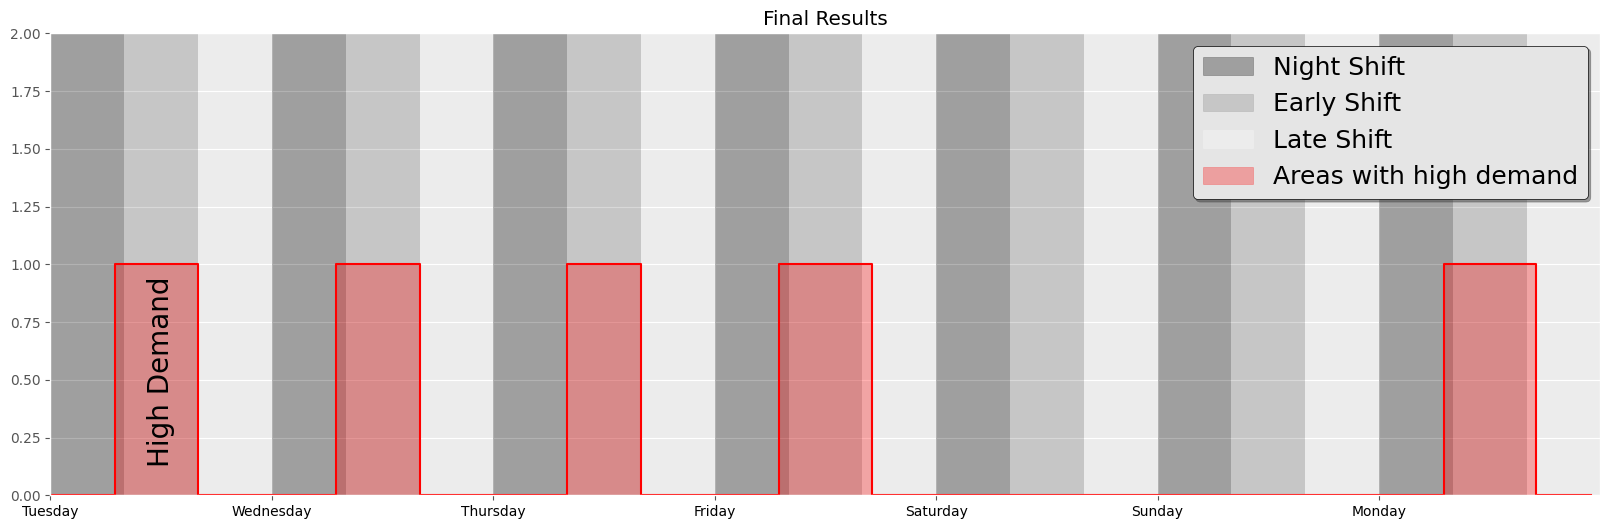

In [6]:
# Create a new figure with the correct size
plt.figure(figsize=(20, 6))
plt.ylim(0,2)
plt.xlim(0,168)

# Use a step plot and color the shifts
plt.step(range(len(clusters)), clusters, where='post', color='red')

for x in night:
    plt.axvspan(x,x+8, facecolor='black', alpha=0.3)
for x in early:
    plt.axvspan(x,x+8, facecolor='grey', alpha=0.3) 
for x in late:
    plt.axvspan(x,x+8, facecolor='white', alpha=0.3)
plt.fill_between(range(len(clusters)), clusters, color='red', alpha=0.3, step='post', label='Filled Area')

# Add text to the plt
plt.text(10.5,0.15,'High Demand', fontsize = 20, rotation =90,color ='black')

# Change the ticks on the x-axis to the days of the week
plt.xticks([x*24 for x in range(7)],['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday','Monday'],color='black')

# Create custom legend handles and labels
legend_handles = [Patch(color='black', alpha=0.3),Patch(color='grey',alpha=0.3),Patch(color='white',alpha=0.3),Patch(color='red',alpha=0.3)]
legend_labels = ['Night Shift','Early Shift','Late Shift','Areas with high demand']

# Add legend with custom handles and labels
plt.legend(handles=legend_handles, labels=legend_labels,loc ='upper right',fontsize=18,edgecolor='black',framealpha=1,shadow='True')

# Change the title
plt.title('Final Results')

# Show the final plot
plt.show()

<div>
<span style ="text-align: justify; display: block; font-size: 15px;">
        <b>Analysis:</b> This figure visualizes the clusters discovered in the previous analysis using a step plot. For this plot, we assume that we have identified the clusters correctly and thus just show whether the hour of the week is part of a cluster ($x=1$) or not ($x=0$) instead of showing the exact demand.  The background is colored according to the three shifts. We assume that the first data point is also the start of a shift. <br> It seems, that the clusters with high demand perfectly align with the second shift of the day. We conclude, that this shift must be the early shift, since there is typicially a higher demand for physicians earlier in the day in real life scenarios. This is due to scheduled operations, accidents during rush hour and work accidents. Additionally, there are two days without high demand in the early shift. Consequently, those are assumed to be the weekend days where there typically aren't many scheduled operations. Therefore, the first day of the dataset must be a Tuesday. We will continue to use these assumptions during the project.
    </span>
</div>


<div style = "margin-top:20px;">
    <span style ="font-size: 23px; font-weight: bold; color: #8EB944;">
        b) Give the mean, median, standard deviation, maximum and minimum for each shift in your
cluster
    </span>
</div>

<div>
<span style ="text-align: justify; display: block; font-size: 15px;">
        <b>Explanation:</b> We have idetified five shifts in our cluster, called shifts 1-5 from now on. It is important to note, that we use the bounds
of the shifts we identified, rather than the bounds of our cluster to calculate the mean, meadian and standard deviation.
    </span>
</div>

<span style ="font-size: 18px; font-weight: bold;color: #43556A;">
Use a DataFrame to calculate the results
</span>

In [7]:
# Create a copy of the original DataFrame and drop the index column
data_1 = pd.DataFrame.copy(data)
data_1.drop('index',axis=1,inplace=True)

#data_1[0:7].mean().mean()

# Creater an upper bound and lower bound for the slices
slices_lb = [8,32,56,80,152]
slices_ub = [16,40,64,88,160]
slices_ub2 = [8,32,56,80,152,168]
slices_lb2 = [0,16,40,64,88,160]
results = {}

# USe a for loop to calculate the values for each of the shifts
for slices in range(5):
    array = data_1[slices_lb[slices]:slices_ub[slices]].values.tolist()
    results[f'Shift{slices+1}'] = [np.mean(array),np.median(array),np.std(array),np.max(array),np.min(array)]
    
# Use a for loop to get the values for all the other shifts
other = []
for slices in range(5):
    array = data_1[slices_lb2[slices]:slices_ub2[slices]].values.tolist()
    for i in array:
        other.append(i)
        
# Calculate the values for the rest of the shifts
results['Other'] = [np.mean(array),np.median(array),np.std(array),np.max(array),np.min(array)]
    
# Convert the dict to a dataframe
rows = ['Mean','Median','Std Dev','Max','Min']
results = pd.DataFrame(results,rows)

# Style the dataframe
results = results.style.format(precision =2).set_table_styles([
    {'selector': 'td', 'props': [('text-align', 'center')]},
    {'selector': 'thead th:not(.index_name)', 'props': 'background-color: #8EB944; color: black; text-align: center;'}
]).set_caption(
    '<span style="font-size: 20px; font-weight: bold;">Comparison of key values</span>')

# Display the dataframe
display(results)

,Shift1,Shift2,Shift3,Shift4,Shift5,Other
Mean,9.17,9.27,8.32,9.06,9.46,0.57
Median,9.00,10.00,9.00,9.00,10.00,0.00
Std Dev,2.27,2.48,2.28,2.17,2.14,1.28
Max,14.00,14.00,13.00,14.00,15.00,8.00
Min,3.00,2.00,0.00,3.00,3.00,0.00


<div>
<span style ="text-align: justify; display: block; font-size: 15px;">
        <b>Analysis:</b> This DataFrame shows the values for the mean, median, standard deviation, maximum and minimum of each shift contained in the cluster. In addition, the <i>'Other'</i> column gives the corresponding values for each shift that is not contained in any cluster. Once again, it is obvious, that the Shifts 1-5 are from the same type. Apart from shift 3, which has a slightly lower mean and standard deviation, the values from all shifts are within a very small window. A lot more interesting is the comparison to the other 16 shifts. The other shifts have a mean of under one and a median of zero, which means that a demand of zero is the most commpn occurance during the rest of the shifts.<br> In summary, the dataset contains two main scenarios: First, the five early shifts in the cluster. These are characterised by high demand with some high spikes, sometimes peaking at 15 doctors. The second type is all the other shifts, where demand is usually close to zero, and usually only one or two doctors are needed. Both types of shifts have in common that demand is fairly constant, both within the five shifts and at other times.
    </span>
</div>

<div style="margin-top: 20px;">
    <span style ="font-size: 40px; font-weight: bold; color: #8EB944">
        Question 5
    </span>
<hr style="color: #8EB944; height: 3px;background-color: #8EB944;border: none">    
<div>
    <span style ="font-size: 23px; font-weight: bold; color: #8EB944">
        How can you improve the schedule by allowing for more flexibility in the schedule?
    </span>
</div>
    
</div>

<div>
    <span style ="font-size: 20px; font-weight: bold;color: #507F7F;">
        Step 1: Problem Definition
    </span>
<hr style="color: #8EB944; height: 1px;background-color: #507F7F;border: none">
</div>

<div>
    <span style="text-align: justify; display: block; font-size: 15px;">
        The main problem with both the deterministic and stochastic models is that they are not flexible enough to adapt the supply of physicians to the non-constant demand during the 8 hours of each shift. This can be seen by looking at the first plot named 'current solution (1)' in the cell below. By assigning a specific number of physicians to each shift, we create rectangles with a heigth equal to the number of physicians in each shift and a length of 8 hours. However, the demand curve is not well approximated by a large rectangle because it follows a normal, Weibull min, or triangular distribution, depending on whether the data is aggregated. Thus, fitting a rectangle under a curve that has a high peak and low tails does not seem appropriate. Creating a larger number of smaller rectangles may help to better approximate the demand curve
    </p>
    </span>
    <p style="text-align: justify; font-size: 15px;">
        The clusters in the demand data discovered in question 1 are a good explanation for why the rectangles do not fit the demand curve very well. At the beginning of the early shift on all weekdays, you can see a sudden spike in demand followed by a sudden drop. Outside the clusters, however, the demand curve looks more like a uniform distribution. During these shifts, assuming a constant number of doctors per hour seems like a reasonable approach. 
        <br> <!-- Visible empty line -->
    <p style="text-align: justify; font-size: 15px;">
        Another problem is that the night shifts are poorly timed. During the actual night time, between midnight and 6 a.m., there is almost no demand, while between 7 a.m. and 9 a.m. demand increases sharply. Scheduling the night shift from midnight to 8 a.m. results in poor utilization during the night hours, as we still need to employ enough doctors to cover the demand at 7 a.m. Therefore, starting the night shift and all subsequent shifts one hour earlier will greatly improve utilization and reduce the total number of physicians needed. The three plots in the following cell showcase the problem (1) the alternative solution (2) introduced below and an unattainable perfect solution (3).
    </p>
</div>

<div>
    <span style ="font-size: 20px; font-weight: bold;color: #507F7F;">
        Step 2: Plots
    </span>
<hr style="color: #8EB944; height: 1px;background-color: #507F7F;border: none">
</div>

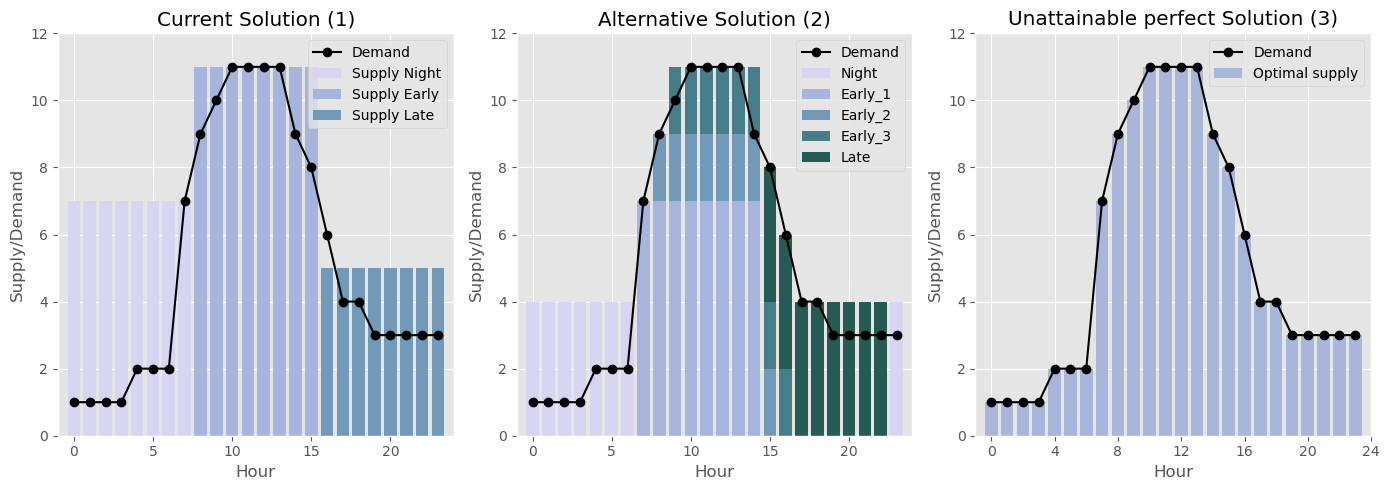

In [35]:
data = data.iloc[0:24]
data = data.mean(axis=1).values
data =np.ceil(data)

# Creating subplots
fig, ax = plt.subplots(1, 3, figsize=(14, 5))

#========================================PLOT 1========================================
shift_map = {'Night': list(range(8)),
             'Early': list(range(8,16)),
             'Late': list(range(16,24)),                   
            }

supply_map = {'Night': [7]*8,
             'Early': [11]*8,
             'Late': [5]*8,                   
            }

new_map = {}
for key in shift_map.keys():
    supply_hour = list(zip(shift_map[key],supply_map[key]))
    new_map[key] = supply_hour

# Define the hours for the plot
hours = list(range(24))

# Initialize an empty list to store demand values for each shift
demand_values = {shift: np.zeros(len(hours)) for shift in new_map.keys()}

# Loop through each hour and update the demand for each shift
for i, hour in enumerate(hours):
    for shift, shift_hours in new_map.items():
        for shift_hour, num_people in shift_hours:
            if hour == shift_hour:
                demand_values[shift][i] += num_people
                
# Custom color palette
colors = sns.cubehelix_palette(start=2)

# Plot the stacked bar plot with custom colors
bottom = np.zeros(len(hours))  # Initialize the bottom of the bars
for shift, demand, color in zip(demand_values.keys(), demand_values.values(), colors):
    ax[0].bar(hours, demand, label='Supply '+shift, bottom=bottom, color=color)
    bottom += demand
    
# Plot the data
ax[0].plot(range(24),data,marker='o',linestyle='-',color='black',label='Demand')



# Set plot labels and title
ax[0].set_xlabel('Hour')
ax[0].set_ylabel('Supply/Demand')
ax[0].set_title('Current Solution (1)')
ax[0].legend()
ax[0].set_ylim(0, 12)
ax[0].set_xlim(-1,24)
plt.xticks([0, 4, 8, 12, 16, 20,24])


#========================================PLOT 2========================================

shift_map2 = {'Night': list(range(23,24))+list(range(7)),
             'Early_1': list(range(7,15)),
             'Early_2': list(range(8,16)),
             'Early_3': list(range(9,17)),
             'Late': list(range(15,23)),                  
            }


supply_map2 = {'Night': [4]*8,
             'Early_1': [7]*8,
             'Early_2': [2]*8,
             'Early_3': [2]*8,
             'Late': [4]*8,                 
            }

new_map2 = {}
for key in shift_map2.keys():
    supply_hour = list(zip(shift_map2[key],supply_map2[key]))
    new_map2[key] = supply_hour

# Initialize an empty list to store demand values for each shift
demand_values = {shift: np.zeros(len(hours)) for shift in new_map2.keys()}

# Loop through each hour and update the demand for each shift
for i, hour in enumerate(hours):
    for shift, shift_hours in new_map2.items():
        for shift_hour, num_people in shift_hours:
            if hour == shift_hour:
                demand_values[shift][i] += num_people

# Custom color palette
colors = sns.cubehelix_palette(start=2)

bottom = np.zeros(len(hours))  # Initialize the bottom of the bars
for shift, demand, color in zip(demand_values.keys(), demand_values.values(), colors):
    ax[1].bar(hours, demand, label=shift, bottom=bottom, color=color)
    bottom += demand

# Plot the data
ax[1].plot(range(24),data,marker='o',linestyle='-',color='black',label='Demand')

# Set plot labels and title
ax[1].set_xlabel('Hour')
ax[1].set_ylabel('Supply/Demand')
ax[1].set_title('Alternative Solution (2)')
ax[1].legend()
ax[1].set_ylim(0,12)
ax[1].set_xlim(-1,24)

#========================================PLOT 3========================================

# Plot the data
plt.plot(range(24),data,marker='o',linestyle='-',color='black',label='Demand')
plt.bar(range(24),data,label='Optimal supply',color='#A9B5D9')

# Set plot labels and title
ax[2].set_xlabel('Hour')
ax[2].set_ylabel('Supply/Demand')
ax[2].set_title('Unattainable perfect Solution (3)')
ax[2].legend()
ax[2].set_ylim(0,12)
ax[2].set_xlim(-1,24)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


<div>
    <span style ="font-size: 20px; font-weight: bold;color: #507F7F;">
        Step 3: Proposed modification to the work plan
    </span>
<hr style="color: #8EB944; height: 1px;background-color: #507F7F;border: none">
</div>
<div style="font-size: 15px; display: block;">
   <p style="text-align: justify;">
       As discussed, the main problem with the current schedule is that it allows limited flexibility, especially in the early weekday shifts. Figure (3) shows what an optimal solution might look like, where demand is known and there is always the perfect number of doctors present at each hour. This solution serves as a gold standard, but is obviously not feasible in a real setting due to work rules and employee satisfaction. Therefore, we try to find a solution that is as close to the gold standard as possible. Below we propose a solution that attempts to do this.  <br></p><p style="text-align: justify;">
As mentioned previously, we can achieve a better fit by using more but smaller rectangles under the curve as display in the plot named 'current solution'. We do that by splitting the early shift into three seperate shifts, called <i>Early 1</i>, <i>Early 2</i> and <i>Early 3</i>. We keep the length of all shifts at eight hours. This solution allows for a much more flexible supply of doctors. The large eight hour long rectangles are replaced by rectangles with a length of one hour which dramatically improves the fit under the curve. This approach is illustrated in Plot (2), which is a better approximation of the optimal solution Plot (3). In this scenario, most doctors arrive in <i>Early 1</i> to cover the sudden increase in demand. These doctors then get supported by <i>Early 2</i> and <i>Early 3</i> during the peak hours. Since the demand is a lot closer to a uniform distribution during the late and night shift, there is no need to further complicate the schedule by introdducing additional shifts in the evening and night.
           <br>
        Another incremental change is made to the three main shifts, which all start one hour earlier. This further improves the fit, but doesn't change the flexibility of the model.
    </p>
    
</div>

<div>
    <span style ="font-size: 20px; font-weight: bold;color: #507F7F;">
        Step 4: Pros and Cons
    </span>
<hr style="color: #8EB944; height: 1px;background-color: #507F7F;border: none">
    
<span style ="font-size: 18px; font-weight: bold;color: #43556A;">
    Advantages
</span>

<div style="text-align: justify; display: block; font-size: 15px;">
<ul>
    <li><strong>Cost:</strong> A more flexible approach helps reduce overtime, which saves the hospital money. Because the late shift ends before midnight, physicians don't have to be paid night differential.</li>
    <li><strong>Bio rythm:</strong> The doctors in the night shift profit by starting one hour earlier, which allows for a small improvment in their bio rythm.</li>
    <li><strong>Well being:</strong> The new schedule offers more flexibility in terms of the social life of the physicians. That is, they can voice their preferences whether they want to work the <i>Early 1</i>, <i>Early 2</i> and <i>Early 3</i> shift to better match their time off with their personal responsibilities and hobbies. Also, the earlier start of the late shift, might lead to a slight increase of well being, though it still ends fairly late.</li>
     <li><strong>Quality of care:</strong> With more early shifts, physicians may have more opportunities to follow up on the cases they initiate. This may slightly improve the quality of care.</li>
</ul>
    
</div>

<span style ="font-size: 18px; font-weight: bold;color: #43556A;">
    Disadvantages
</span>

<div style="text-align: justify; display: block; font-size: 15px;">
<ul>
    <li><strong>Transition:</strong> Changing the current schedule involves a transition period where established routines are disrupted, requiring time for adjustment. This might lead to a temporary decrease in productivity and efficency.</li>
    <li><strong>Bio rythm:</strong> The bio rythm of the doctors working the Early 1 shift might be effected in a negative way due to the earlier starting time.</li>
    <li><strong>Well being:</strong> The new schedule might lead to some confusion for doctors working alternating early shifts. This could lead to doctors mixing up their starting times and arriving late (or early). </li>
     <li><strong>Logistical Challenges:> </strong> Managing multiple shifts might pose logistical challenges for scheduling or during the shift handover. The more complicated work plan may also increase costs slightly.</li>
</ul>
    
</div>

<span style ="font-size: 18px; font-weight: bold;color: #43556A;">
    Conclusion
</span>

<div style="text-align: justify; display: block; font-size: 15px;">
 <p style="text-align: justify; font-size: 15px;">The proposed solution does not drastically change the schedule and lives of employees. Rather, it introduces incremental changes to the existing schedule. However, substantial improvements can be made in terms of undercoverage and employee utilization. The new schedule structure allows for a better fit under the demand distribution and thus reduces overall costs by requiring fewer doctors.
<br>
        In conclusion, the advantages of the solution considerably outweigh the disadvantages and dramatically improve flexibility.
    
</p>
    
</div>